In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [8]:
can_data = pd.read_csv("../../raw_data/canada_population.csv")
can_data = can_data.drop(columns=["GEO", "DGUID", "Sex", "UOM", "UOM_ID", "SCALAR_FACTOR",
                         "SCALAR_ID", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED", "DECIMALS"])
can_data = can_data[can_data["Age group"] == "All ages"]

In [9]:
ont_data = pd.read_csv("../../raw_data/ontario_population.csv")
ont_data = ont_data.drop(columns=["GEO", "DGUID", "Sex", "UOM", "UOM_ID", "SCALAR_FACTOR",
                         "SCALAR_ID", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED", "DECIMALS"])
ont_data = ont_data[ont_data["Age group"] == "All ages"]

In [10]:
can_reg_x = can_data["REF_DATE"]
can_reg_x = np.array(can_reg_x).reshape(-1, 1)
can_reg_y = can_data["VALUE"]
can_reg_model = LinearRegression()
can_reg_model.fit(can_reg_x, can_reg_y)
can_r_sq = can_reg_model.score(can_reg_x, can_reg_y)
can_intercept = can_reg_model.intercept_
can_slope = can_reg_model.coef_
print(f"CAN R^2: {can_r_sq}")
print(f"CAN Intercept: {can_intercept}")
print(f"CAN Slope: {can_slope}")

CAN R^2: 0.9964376277213557
CAN Intercept: -676931759.269925
CAN Slope: [353731.50827068]


In [11]:
ont_reg_x = ont_data["REF_DATE"]
ont_reg_x = np.array(ont_reg_x).reshape(-1, 1)
ont_reg_y = ont_data["VALUE"]
ont_reg_model = LinearRegression()
ont_reg_model.fit(ont_reg_x, ont_reg_y)
ont_r_sq = ont_reg_model.score(ont_reg_x, ont_reg_y)
ont_intercept = ont_reg_model.intercept_
ont_slope = ont_reg_model.coef_
print(f"ONT R^2: {ont_r_sq}")
print(f"ONT Intercept: {ont_intercept}")
print(f"ONT Slope: {ont_slope}")

ONT R^2: 0.9923942450123879
ONT Intercept: -260101126.52180463
ONT Slope: [135944.10150376]


In [12]:
can_pred_2025 = can_reg_model.predict(np.array([2025]).reshape(-1, 1))
can_pred_2050 = can_reg_model.predict(np.array([2050]).reshape(-1, 1))
print(f"CAN Predicted population (2025): {can_pred_2025}")
print(f"CAN Predicted population (2050): {can_pred_2050}")

CAN Predicted population (2025): [39374544.97819543]
CAN Predicted population (2050): [48217832.68496239]


In [13]:
ont_pred_2025 = ont_reg_model.predict(np.array([2025]).reshape(-1, 1))
ont_pred_2050 = ont_reg_model.predict(np.array([2050]).reshape(-1, 1))
print(f"ONT Predicted population (2025): {ont_pred_2025}")
print(f"ONT Predicted population (2050): {ont_pred_2050}")

ONT Predicted population (2025): [15185679.02330828]
ONT Predicted population (2050): [18584281.56090224]


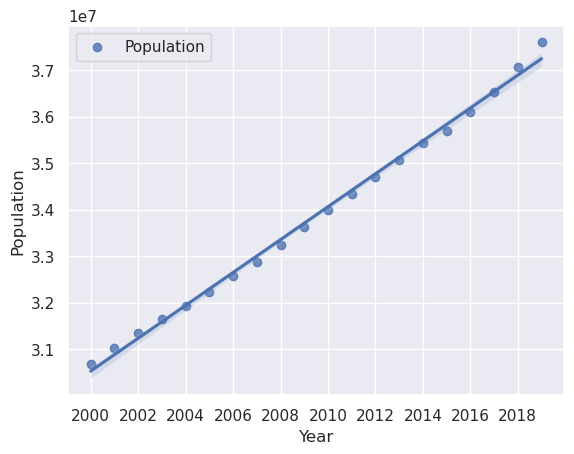

In [19]:
sns.regplot(x=can_reg_x, y=can_reg_y, label="Population")
# plt.plot(can_reg_x, can_reg_model.predict(can_reg_x), color="k", label="Regression")
plt.xlabel("Year")
plt.xticks(np.arange(can_reg_x[0], can_reg_x[len(can_reg_x)-1], step=2))
plt.ylabel("Population")
plt.legend(loc="upper left")
plt.savefig("../../img/canada_population.png")

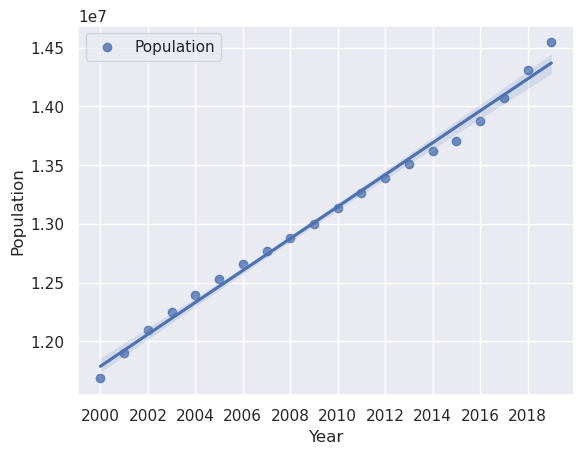

In [20]:
sns.regplot(x=ont_reg_x, y=ont_reg_y, label="Population")
# plt.plot(ont_reg_x, ont_reg_model.predict(ont_reg_x), color="k", label="Regression")
plt.xlabel("Year")
plt.xticks(np.arange(ont_reg_x[0], ont_reg_x[len(ont_reg_x)-1], step=2))
plt.ylabel("Population")
plt.legend(loc="upper left")
plt.savefig("../../img/ontario_population.png")